# Part.01 : RAG 기초 이론 & 실습

## CH01.RAG의 개요 및  개념

### RAG (Retrieval-Augmented Generation)
자연어 처리 (NLP) 분야에서 사용되는 기술로 정보 검색을 통해 언어 생성 과정을 향상 시키는 방식

### RAG의 작동 원리
1. 정보 검색 단계 : 사용자의 질문이나 입력에 가장 관련성이 높은 정보를 데이터베이스나 인터넷에사 찾음, 이 과정에서 질문에 답할 수 있는 콘텐츠나 문서를 선택하기 위해 유사도 검색 같은 기술이 사용
2. 언어 생성 단계 : 검색된 정보를 바탕으로, 생성 모델을 생성, 생성 모델은 검색된 콘텐츠를 활용하여 보다 정확하고 정보에 기반한 답변을 생성

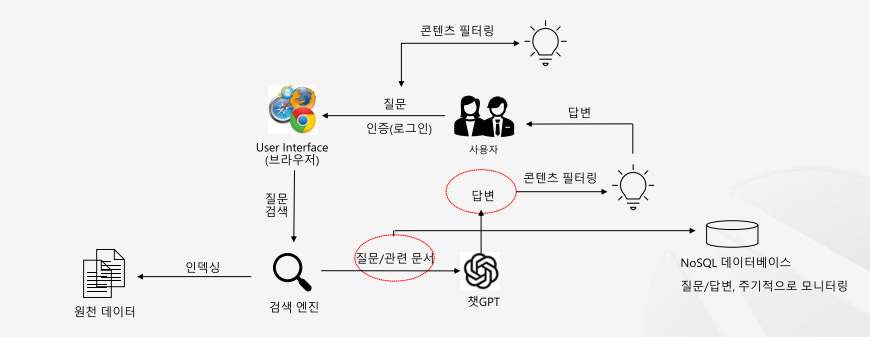


### RAG 파이프라인
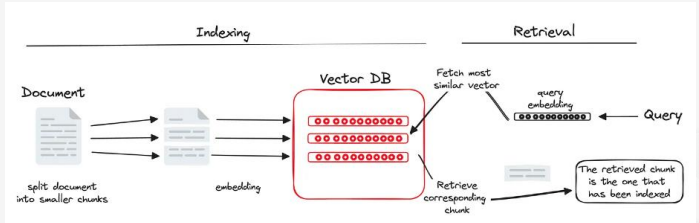
- 문장을 단어로 분리한 다음에 임베딩 처리를 하면 Vector로 추출된 것을 Vector DB에 저장
- Retrieval 사용자가 질문을 하면 질문 한 텍스트도 동일하게 Vector로 변환을 해서 Vector DB와 유사도 검색(코사인 유사도, 유클리드 )을 해서 LLM 모델에 청크 데이터를 보내서 처리 후 사용자에게 출력

### RAG 개요
- RAG는 언제 사용하는가?  
    <파인튜닝이 필요한 요건>  
    1. 특정 도메인에 최적화된 모델이 필요한 경우  
    2. 고유한 비즈니스 요구사항 충족이 필요한 경우  
    3. 모델이 사실이 아닌 진술을 하는경우  
    4. 모델 결과의 정확도가 사용자의 기대치에 미치지 못하는 경우  

    <파인튜닝의 제약사항>
    1. 파인튜닝을 위해 GPU 필요
    2. 얼마나 학습을 시켜야 원하는 결과가 나오는지 알기 어려움
    3. 데이터가 변경될 때마다 추가 학습 필요
    4. 질문과 다변으로 구성된 데이터 준비
    5. 방대한 분량이 데이터 준비
    6. 파인튜닝 비용

    <RAG가 필요한 요건>
    1. 개인/기업 데이터를 LLM과 연계하여 서비스를 하고자 할 때
    2. 실시간으로 변화하는 정보를 반영해야 하는 경우
    3. 다양한 정보를 통합한 질의 응답 시스템을 구축하고자 할 때

    <RAG의 제약사항>
    1. 정보 검색의 정확도
    2. 처리 속도와 효율성
    3. 복잡도와 자원 요구 사항
    4. 정보 손실  
        4-1) 임베딩 벡터 과정에서의 손실 : 문서가 긴 경우에 정해진 벡터의 차원으로 표현하기 어려울 수 있음  
        4-2) 검색 과정에서의 손실 : 질문과 문서 사이의 관려성이 떨어질 수 있음 -> Reranking으로 해결 가능

    <RAG 구현시 데이터 흐름 : 검색 측면>
    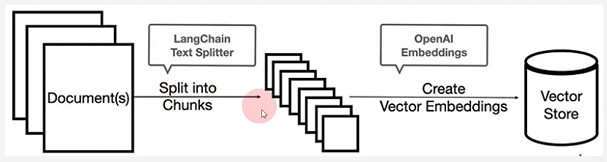  
            Chunks : 문장을 단어 단위로 나누는 과정  
            Embedding : Vector로 변화를 해서 DB 저장 (Chroma,FAISS,Pinecone)

    <RAG 구현시 데이터 흐름 : 생성 측면>
    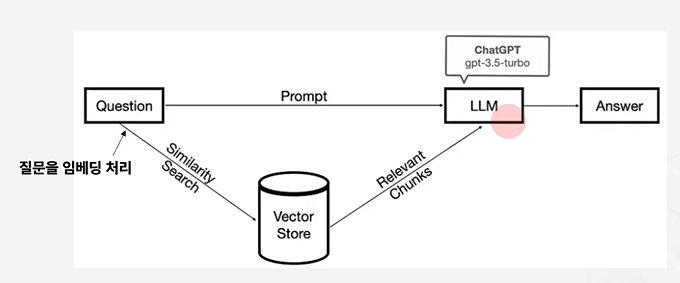  
            질문도 임배딩 처리 해서 Vector Store 와 유사도를 측정해서 Chunks로 LLM에 전달
    
    <RAG 구현시 데이터 흐름 : 전체 흐름>
    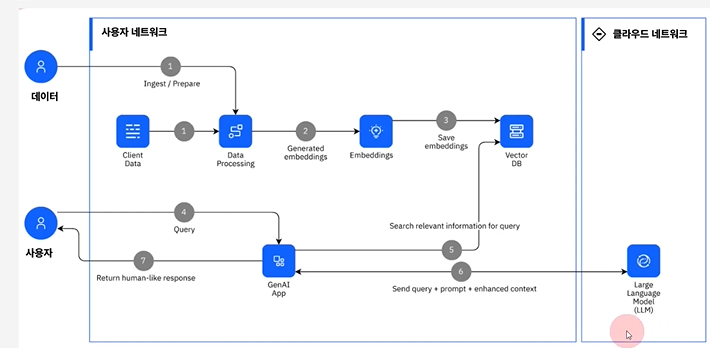
    


## CH.02  청킹 (Chunking)
- LLM에서 청킹 (Chunking)은 긴 텍스트 데이터를 더 작은 단위로 나누는 과정을 의미  
    - 입력 데이터의 크기에 대한 제한  
    - 처리 시간 단축  
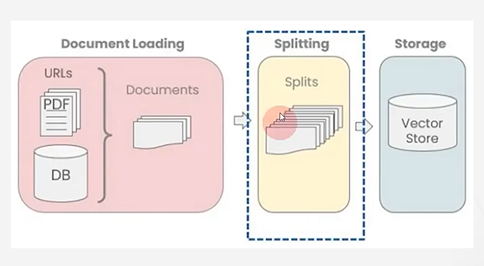  
 -> Splitthing 하는 과정을 Chunking이라고도 한다

- Chunk_size 와 Chunk_overloop  
    - Chunk_size는 문장을 어느 정도의 크기로 할지 정하는 것
    - Chunk_overloop는 앞,뒤 Chunk_size를 연결 해줄지 말지 결정하는것

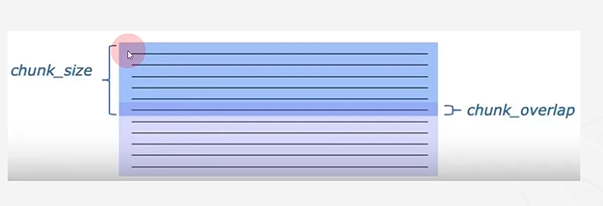





In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter

text = """Content filters work by identifying online communication that needs to be filtered such as website URLs, emails, or SMS. \
By categorizing the form of communication based on filters set by the user the system \
can compare the categorized online communication to a list of restricted content. Based on the comparison \n\n  \
the system decides to allow or block access the users access to the content. Content filtering can be performed on different levels. \
Using email filters, web filters, or messaging filters you can analyze the content of emails, web pages, \
or messages, blocking or allowing them based on specific criteria, such as keywords or categories.\
to certain websites or applications based on specific policies set by an organization."""
